In [13]:
import requests
import json
from Final_Authentication_keys import BLS_api_key


url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

headers = {
    'Content-type': 'application/json',
}


series = [
    'LAUDV534264400000004',  # Seattle-Bellevue-Everett, WA Metropolitan Division
    'LAUMT363562000000004',  # New York City Metropolitan Area
    'LAUDV063108400000004',  # Los Angeles Metropolitan Area
    'LAUDV171697400000004',  # Chicago Metropolitan Area
    'LAUMT481910000000004',  # Dallas-Fort Worth Metropolitan Area
    'LAUMT064186000000004',  # San Francisco Bay Area
]


start_year = '2018'
end_year = '2023'


data = {
    'seriesid': series,
    'startyear': start_year,
    'endyear': end_year,
    'registrationKey': BLS_api_key, 
}

response = requests.post(url, headers=headers, json=data)

json_data = response.json()

with open('bls_Unemployment_data.json', 'w') as f:
    json.dump(json_data, f)


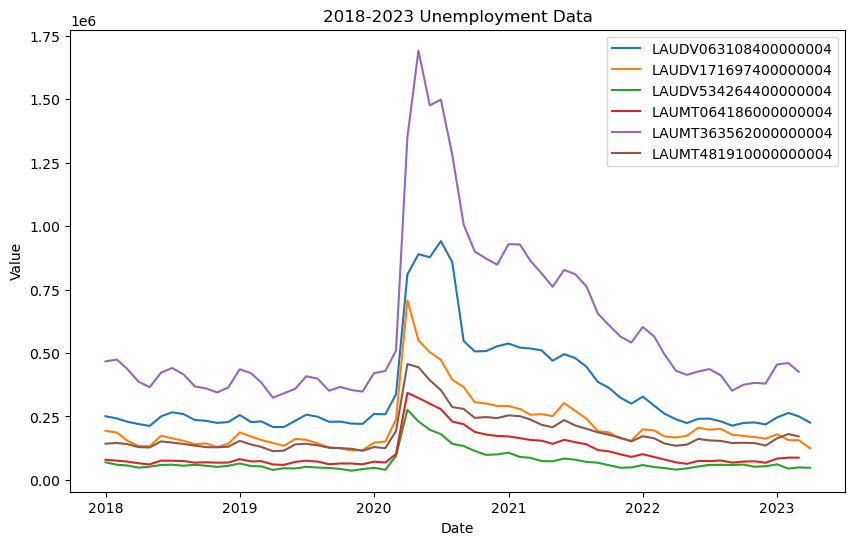

In [16]:
import pandas as pd
import json
import matplotlib.pyplot as plt


with open('bls_Unemployment_data.json') as f:
    data = json.load(f)

flattened_data = []
for series in data['Results']['series']:
    series_id = series['seriesID']
    for datapoint in series['data']:
        flattened_data.append({
            'seriesID': series_id,
            'year': datapoint['year'],
            'period': datapoint['period'],
            'value': float(datapoint['value']),
        })
df = pd.DataFrame(flattened_data)


df['date'] = pd.to_datetime(df['year'] + df['period'].str[1:], format='%Y%m')


plt.figure(figsize=(10,6))
for series_id, group in df.groupby('seriesID'):
    plt.plot(group['date'], group['value'], label=series_id)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('2018-2023 Unemployment Data')
plt.show()


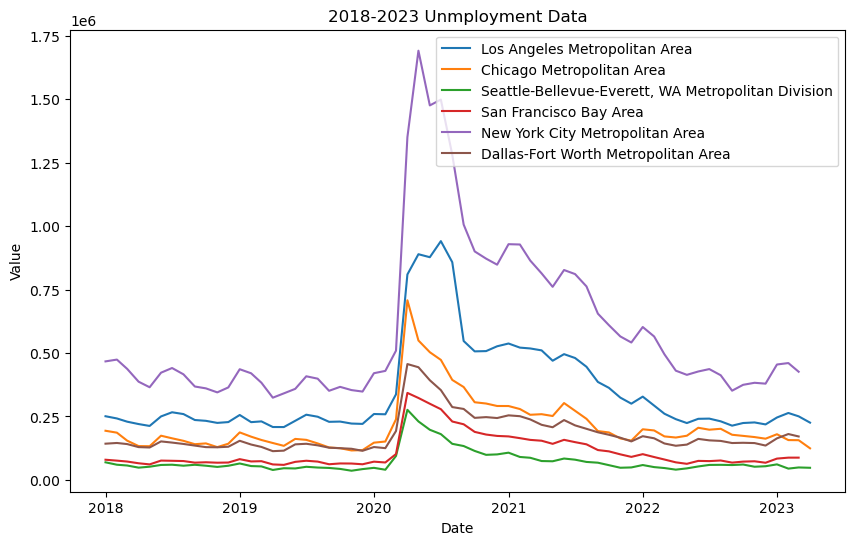

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt

series_to_area = {
    'LAUDV534264400000004': 'Seattle-Bellevue-Everett, WA Metropolitan Division',
    'LAUMT363562000000004': 'New York City Metropolitan Area',
    'LAUDV063108400000004': 'Los Angeles Metropolitan Area',
    'LAUDV171697400000004': 'Chicago Metropolitan Area',
    'LAUMT481910000000004': 'Dallas-Fort Worth Metropolitan Area',
    'LAUMT064186000000004': 'San Francisco Bay Area'
}

with open('bls_Unemployment_data.json') as f:
    data = json.load(f)

flattened_data = []
for series in data['Results']['series']:
    series_id = series['seriesID']
    for datapoint in series['data']:
        flattened_data.append({
            'seriesID': series_id,
            'year': datapoint['year'],
            'period': datapoint['period'],
            'value': float(datapoint['value']),
        })
df = pd.DataFrame(flattened_data)

df['date'] = pd.to_datetime(df['year'] + df['period'].str[1:], format='%Y%m')

plt.figure(figsize=(10,6))
for series_id, group in df.groupby('seriesID'):
    area_name = series_to_area.get(series_id, series_id)
    plt.plot(group['date'], group['value'], label=area_name)
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('2018-2023 Unmployment Data')
plt.show()


employment

In [15]:
import requests
import json
from Final_Authentication_keys import BLS_api_key


url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

headers = {
    'Content-type': 'application/json',
}


series = [
    'LAUDV534264400000005',  # Seattle-Bellevue-Everett, WA Metropolitan Division
    'LAUMT363562000000005',  # New York City Metropolitan Area
    'LAUDV063108400000005',  # Los Angeles Metropolitan Area
    'LAUDV171697400000005',  # Chicago Metropolitan Area
    'LAUMT481910000000005',  # Dallas-Fort Worth Metropolitan Area
    'LAUMT064186000000005',  # San Francisco Bay Area
]


start_year = '2018'
end_year = '2023'


data = {
    'seriesid': series,
    'startyear': start_year,
    'endyear': end_year,
    'registrationKey': BLS_api_key, 
}

response = requests.post(url, headers=headers, json=data)

json_data = response.json()

with open('bls_Employment_data.json', 'w') as f:
    json.dump(json_data, f)


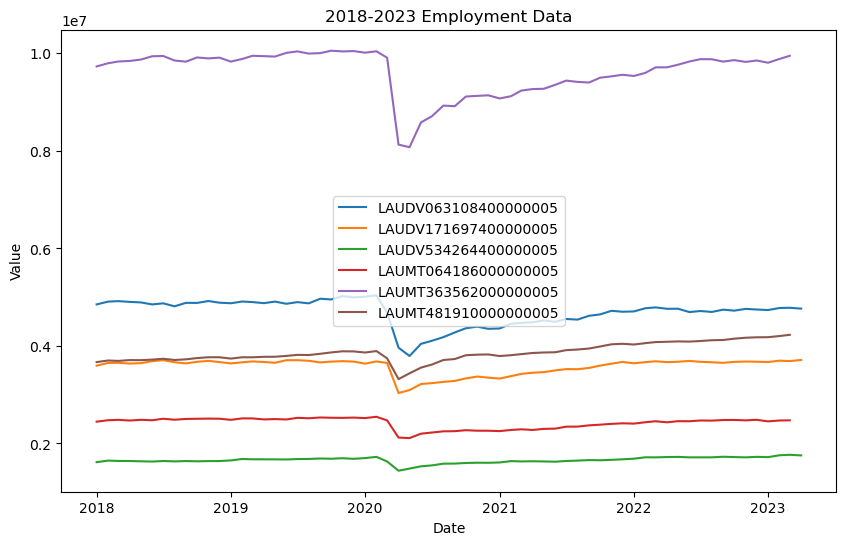

In [19]:
import pandas as pd
import json
import matplotlib.pyplot as plt


with open('bls_Employment_data.json') as f:
    data = json.load(f)

flattened_data = []
for series in data['Results']['series']:
    series_id = series['seriesID']
    for datapoint in series['data']:
        flattened_data.append({
            'seriesID': series_id,
            'year': datapoint['year'],
            'period': datapoint['period'],
            'value': float(datapoint['value']),
        })
        
df = pd.DataFrame(flattened_data)


df['date'] = pd.to_datetime(df['year'] + df['period'].str[1:], format='%Y%m')


plt.figure(figsize=(10,6))
for series_id, group in df.groupby('seriesID'):
    plt.plot(group['date'], group['value'], label=series_id)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('2018-2023 Employment Data')
plt.show()


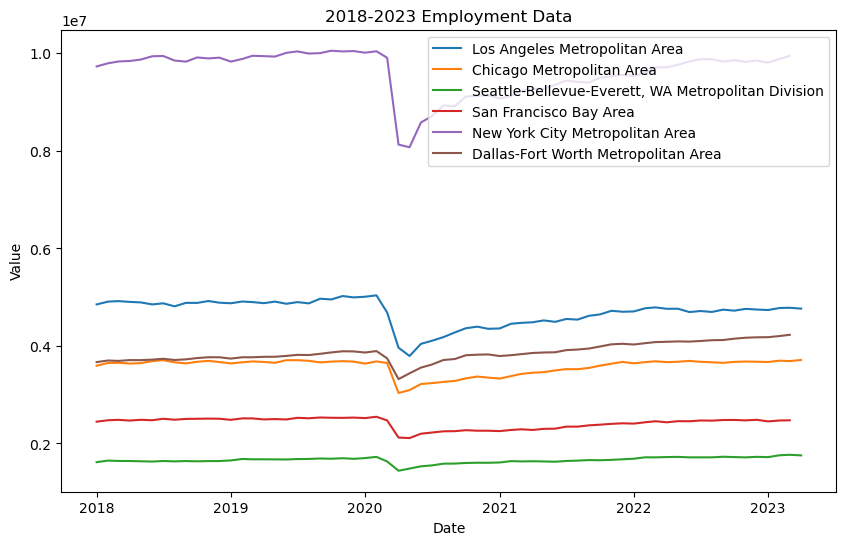

In [22]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Define the mapping between series IDs and area names
series_to_area = {
    'LAUDV534264400000005': 'Seattle-Bellevue-Everett, WA Metropolitan Division',
    'LAUMT363562000000005': 'New York City Metropolitan Area',
    'LAUDV063108400000005': 'Los Angeles Metropolitan Area',
    'LAUDV171697400000005': 'Chicago Metropolitan Area',
    'LAUMT481910000000005': 'Dallas-Fort Worth Metropolitan Area',
    'LAUMT064186000000005': 'San Francisco Bay Area'
}

with open('bls_Employment_data.json') as f:
    data = json.load(f)

flattened_data = []
for series in data['Results']['series']:
    series_id = series['seriesID']
    for datapoint in series['data']:
        flattened_data.append({
            'seriesID': series_id,
            'year': datapoint['year'],
            'period': datapoint['period'],
            'value': float(datapoint['value']),
        })
df = pd.DataFrame(flattened_data)

df['date'] = pd.to_datetime(df['year'] + df['period'].str[1:], format='%Y%m')

plt.figure(figsize=(10,6))
for series_id, group in df.groupby('seriesID'):
    area_name = series_to_area.get(series_id, series_id)
    plt.plot(group['date'], group['value'], label=area_name)
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('2018-2023 Employment Data')
plt.show()


More specifically analysis the characteristics of the un/employment